<a href="https://colab.research.google.com/github/Mugundhan04/Face-mask-detection/blob/main/cnncode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define paths to your dataset
train_dir = "/content/drive/MyDrive/old_cnn/data_cnn1"
test_dir = "/content/drive/MyDrive/dtraintest/train"

# Define image dimensions and batch size
img_height, img_width = 128, 128
batch_size = 32

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess training and testing images
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

Found 536 images belonging to 2 classes.
Found 107 images belonging to 2 classes.


In [ ]:
def build_model(hp):
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(128,128,3)
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dense(10, activation='softmax')
  ])

  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

  return model

In [ ]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.7 MB/s eta 0:00:00


In [ ]:
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

In [ ]:
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5,directory='output1',project_name="cnn_model")

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd

In [ ]:
tuner_search.search(train_data,epochs=3,validation_data=test_data)

Trial 5 Complete [00h 00m 33s]
val_accuracy: 0.5327102541923523

Best val_accuracy So Far: 0.9813084006309509
Total elapsed time: 00h 04m 39s


In [ ]:
model=tuner_search.get_best_models(num_models=1)[0]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 120, 120, 32)      25632     
                                                                 
 flatten (Flatten)           (None, 460800)            0         
                                                                 
 dense (Dense)               (None, 64)                29491264  
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 29519978 (112.61 MB)
Trainable params: 29519978 (112.61 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(train_data, epochs=10, validation_data=test_data, initial_epoch=3)

Epoch 4/10
17/17 [==============================] - 9s 400ms/step - loss: 0.3754 - accuracy: 0.8750 - val_loss: 0.0780 - val_accuracy: 0.9813
Epoch 5/10
17/17 [==============================] - 8s 478ms/step - loss: 0.2995 - accuracy: 0.8918 - val_loss: 0.0663 - val_accuracy: 0.9813
Epoch 6/10
17/17 [==============================] - 8s 458ms/step - loss: 0.3136 - accuracy: 0.8955 - val_loss: 0.0794 - val_accuracy: 0.9907
Epoch 7/10
17/17 [==============================] - 7s 403ms/step - loss: 0.3049 - accuracy: 0.8713 - val_loss: 0.0881 - val_accuracy: 0.9813
Epoch 8/10
17/17 [==============================] - 8s 474ms/step - loss: 0.2819 - accuracy: 0.9067 - val_loss: 0.0849 - val_accuracy: 0.9813
Epoch 9/10
17/17 [==============================] - 7s 403ms/step - loss: 0.3322 - accuracy: 0.9030 - val_loss: 0.0802 - val_accuracy: 0.9813
Epoch 10/10
17/17 [==============================] - 8s 461ms/step - loss: 0.3016 - accuracy: 0.8937 - val_loss: 0.0778 - val_accuracy: 0.9813


1/1 [==============================] - 0s 445ms/step


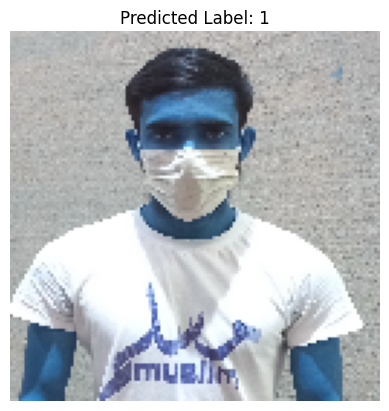

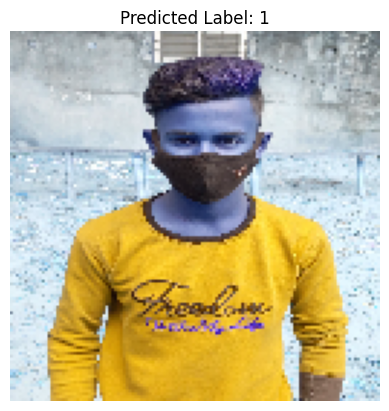

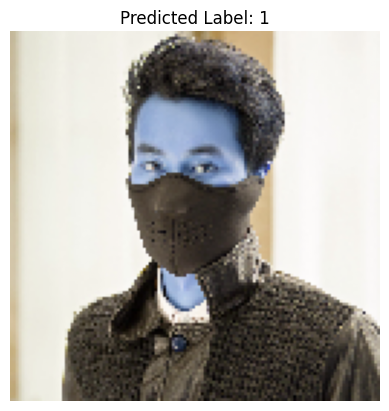

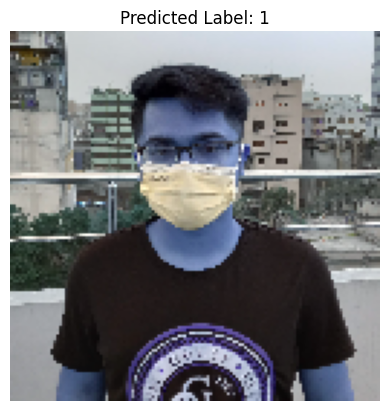

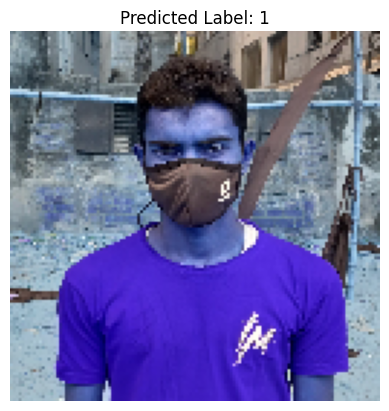

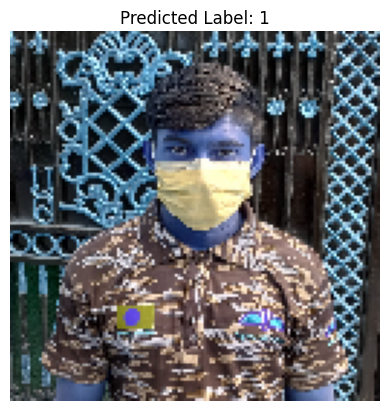

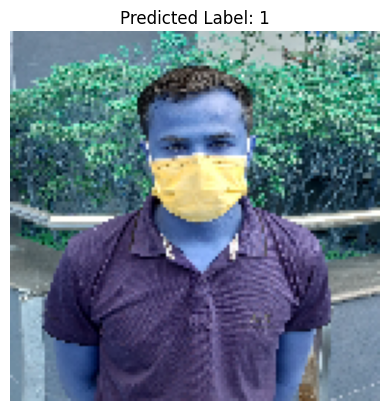

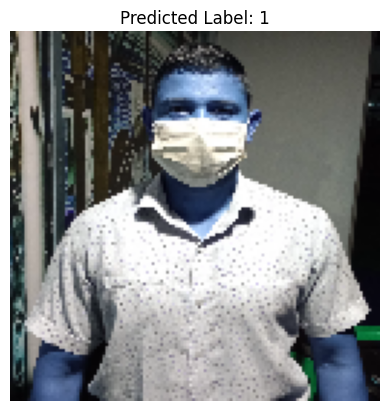

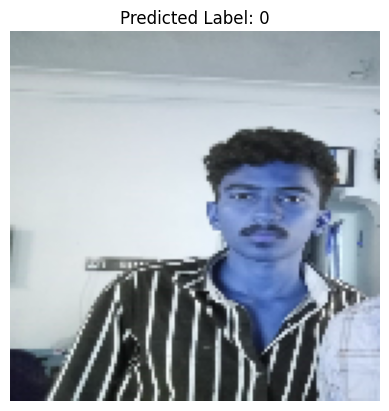

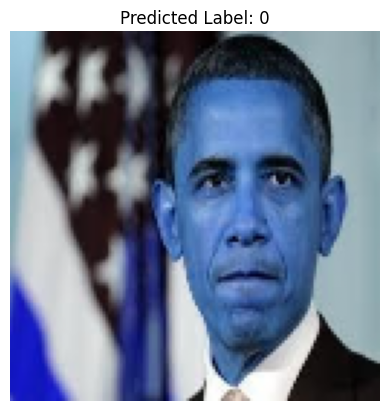

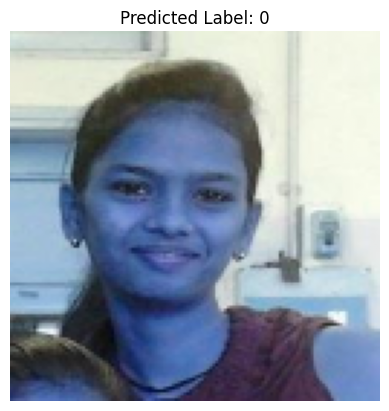

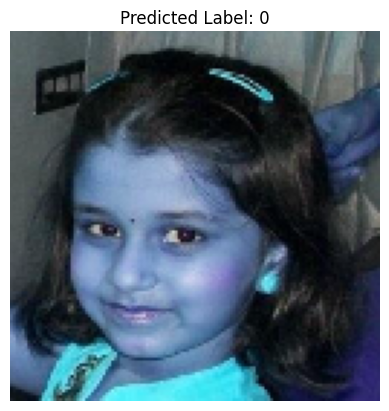

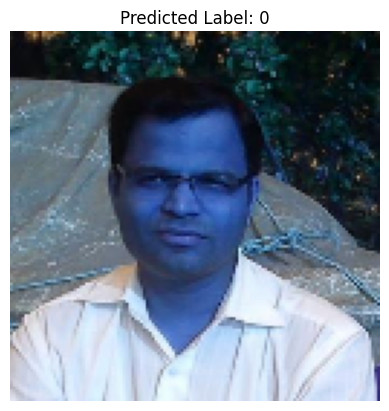

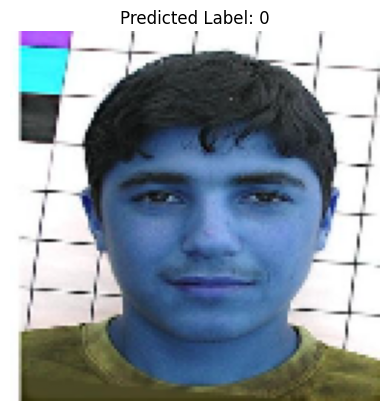

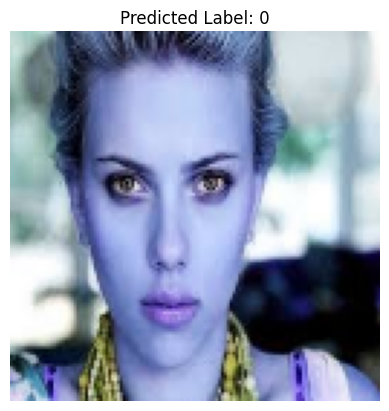

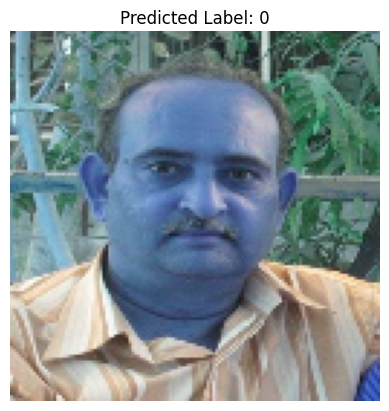

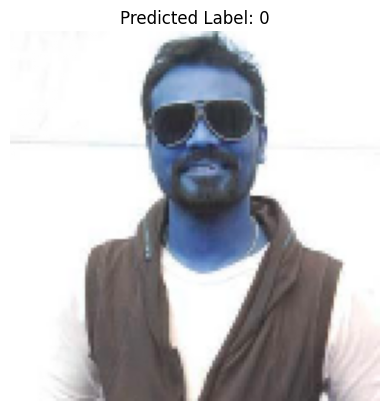

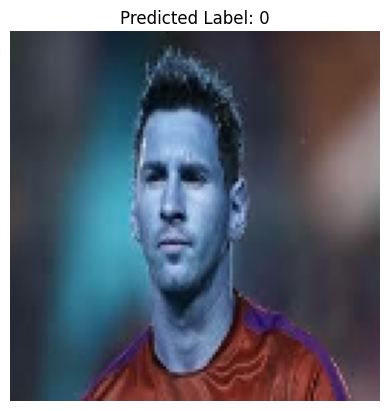

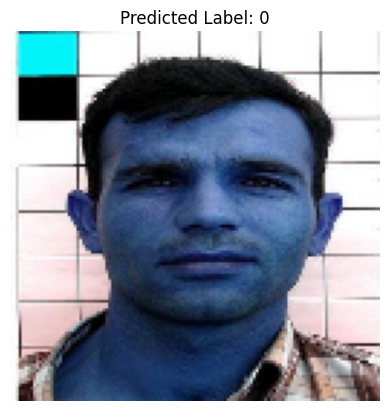

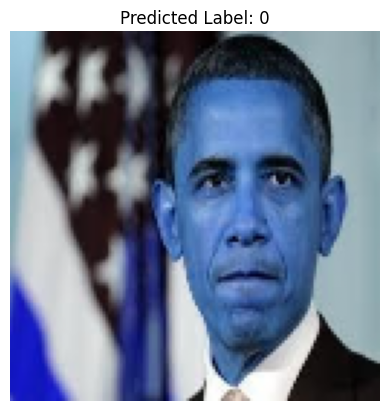

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

test_dir = '/content/drive/MyDrive/evaluation/cnn'
def load_images_from_directory(directory):
    images = []
    for filename in os.listdir(directory):
        img_path = os.path.join(directory, filename)
        if os.path.isfile(img_path):
            img = cv2.imread(img_path)
            img = cv2.resize(img, (128, 128))  # Resize image to match model input size
            img = img / 255.0  # Normalize pixel values
            images.append(img)
    return np.array(images)

test_images = load_images_from_directory(test_dir)

# Make predictions on the test images
predictions = model.predict(test_images)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Display images along with their predicted labels
for i in range(len(test_images)):
    plt.imshow(test_images[i])
    plt.title("Predicted Label: {}".format(predicted_labels[i]))
    plt.axis('off')
    plt.show()

Found 1279 images belonging to 2 classes.
Test Loss: 0.3793124258518219
Test Accuracy: 0.8772478699684143
40/40 [==============================] - 6s 144ms/step


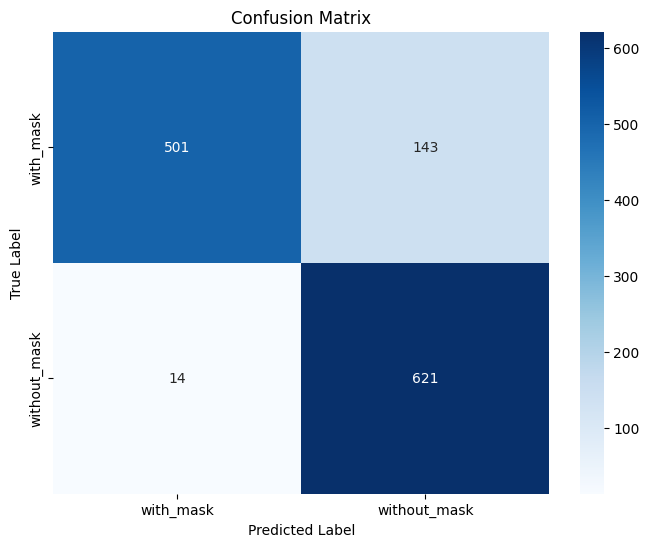

Classification Report:
              precision    recall  f1-score   support

   with_mask       0.97      0.78      0.86       644
without_mask       0.81      0.98      0.89       635

    accuracy                           0.88      1279
   macro avg       0.89      0.88      0.88      1279
weighted avg       0.89      0.88      0.88      1279



In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Define test data generator
test_datagen = ImageDataGenerator(rescale=1./255)  # Rescale pixel values to [0, 1]

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/train',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',  # Assuming you have multiple classes
    shuffle=False  # Set shuffle to False to maintain order of predictions
)

# Evaluate the model on the test data generator
test_loss, test_accuracy = model.evaluate(test_generator, verbose=0)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Predict classes for the test data generator
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Get true labels from the test generator
true_labels = test_generator.classes

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Generate classification report
class_names = list(test_generator.class_indices.keys())
print("Classification Report:")
print(classification_report(true_labels, predicted_classes, target_names=class_names))